## Import all Essential Libraries

## Read the Data file

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [3]:
import os
print(os.getcwd())


C:\Users\mannu\OneDrive\Desktop\Diabetic Prediction Project\Notebook


In [4]:

data = pd.read_csv("../Dataset/diabetes.csv")  # Correct relative path


In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We can see there few data for columns Glucose , Insulin, skin thickenss, BMI and Blood Pressure which have value as 0. That's not possible,right? you can do a quick search to see that one cannot have 0 values for these.
Let's deal with that. we can either remove such data or simply replace it with their respective mean values.
Let's do the latter.

In [8]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
data['Age'].unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68], dtype=int64)

In [11]:
data['Outcome'].unique()

array([1, 0], dtype=int64)

## Imbalanced Dataset

In [12]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

# Here few misconception is there lke BMI can not be zero, BP can't be zero, glucose, insuline can't be zero so lets try to fix it now replacing zero values with the mean of the column


In [13]:
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())


In [14]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Outlier----Handle by Standard Scaler Or Used IQR method To handle this Outlier

<Axes: >

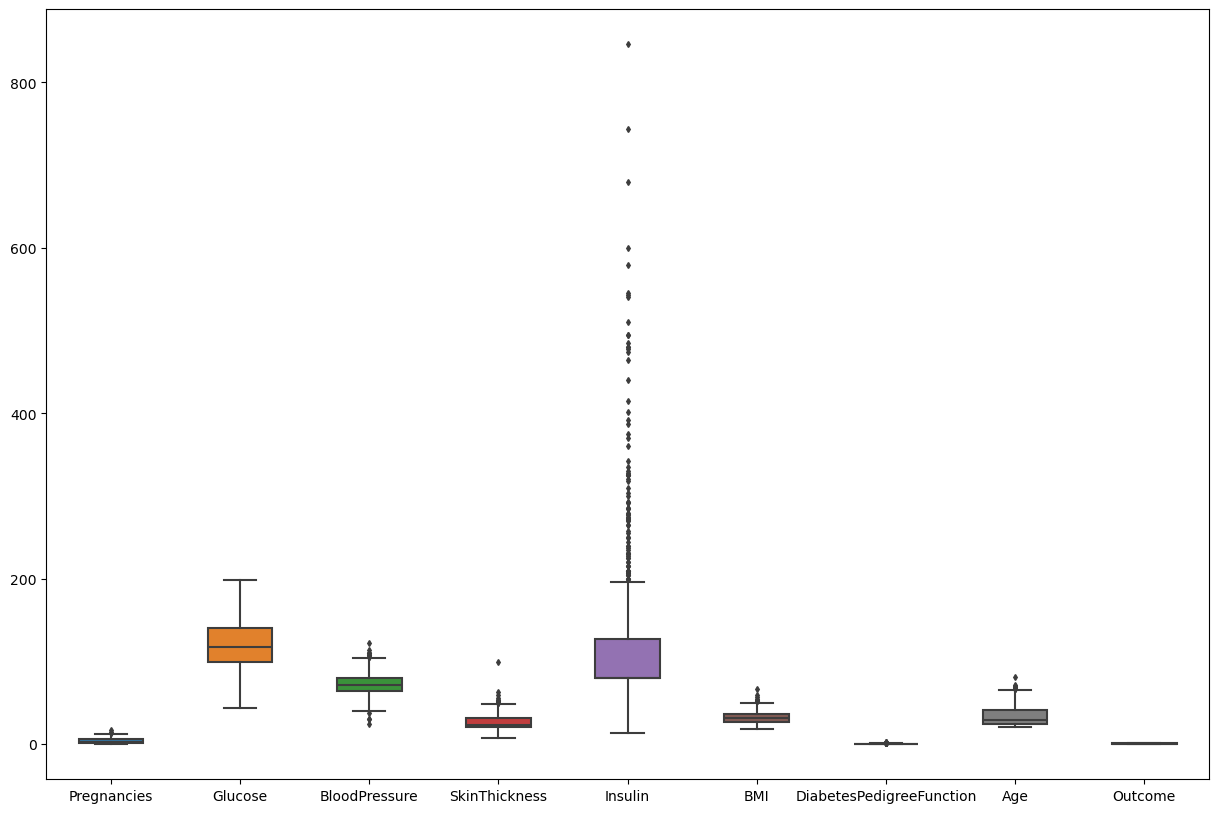

In [15]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

## Give Dataset ,Outlier are present and these oulier are handle by Standarization

In [16]:
numeric_feature=[features for features in data.columns if data[features].dtype!='O']
categorical_feature=[features for features in data.columns if data[features].dtype=='O']

In [17]:
## Print Columns
print("We have {} numerical features : {}".format(len(numeric_feature),numeric_feature))
print("We have {} categorical features : {}".format(len(categorical_feature),categorical_feature))

We have 9 numerical features : ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
We have 0 categorical features : []


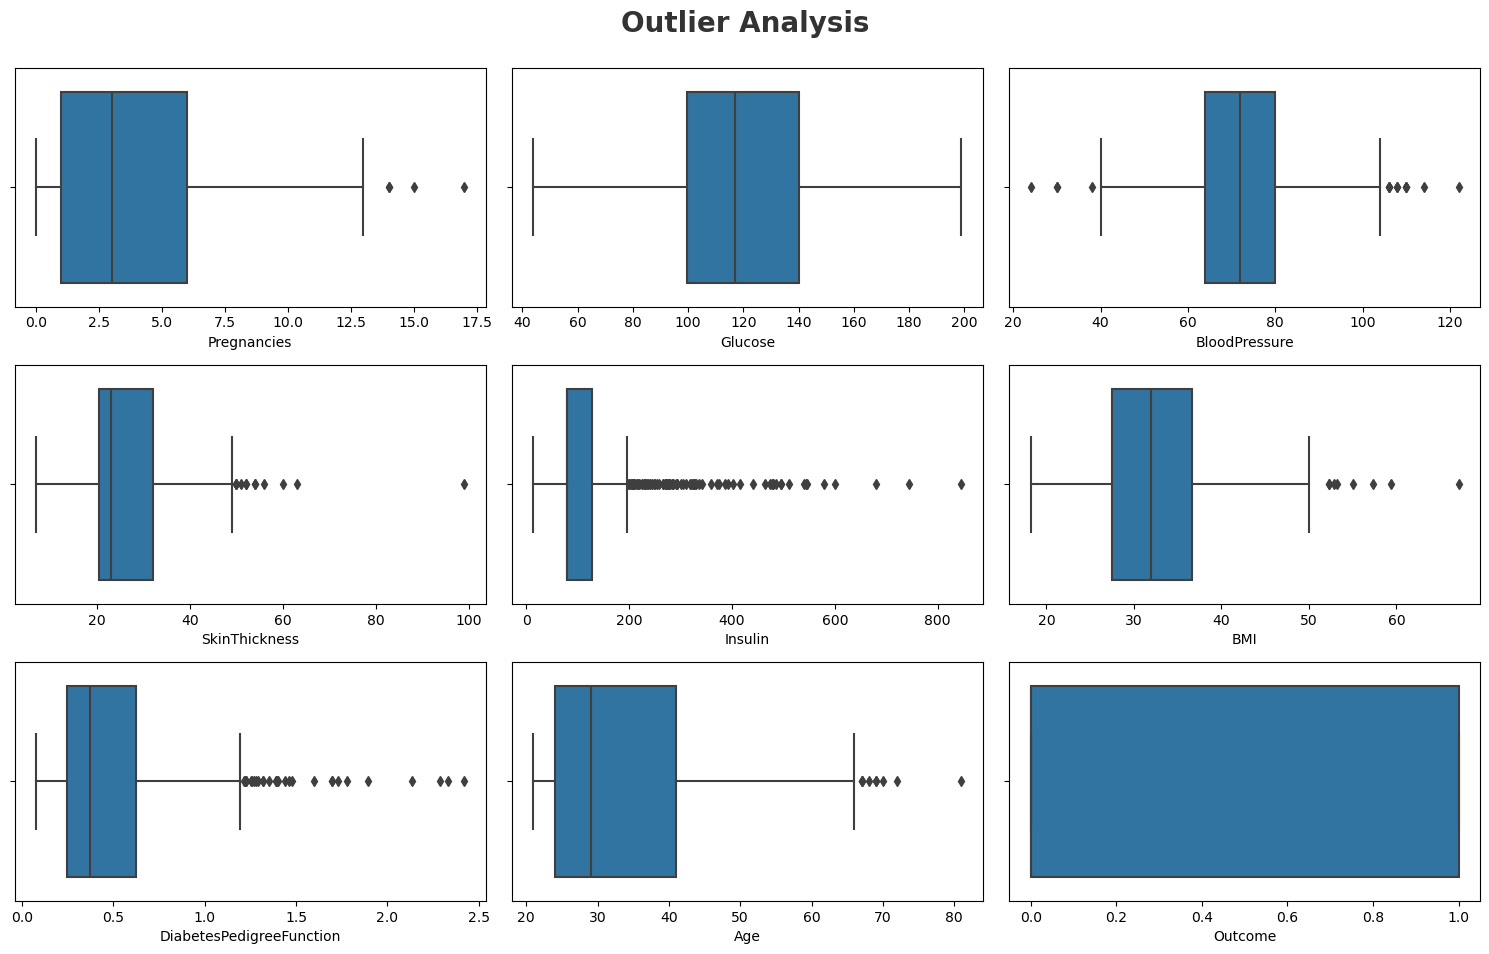

In [18]:
plt.figure(figsize=(15, 15))
plt.suptitle('Outlier Analysis', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_feature)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(x=data[numeric_feature[i]])
    plt.xlabel(numeric_feature[i])
    plt.tight_layout()

## Outlier Handle By Standard Scaler Method

# Separate the Dependent and Independent Dataset..

In [19]:
X=data.drop('Outcome',axis=1)

In [20]:
y=data['Outcome']

In [21]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33


In [22]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

## Separate the Dataset into Train And Split

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
X_train.shape,X_test.shape

((576, 8), (192, 8))

# Now Standarization

## Method-1 Initial Way
scaler=StandardScaler()  
X_train_scaled=scaler.fit_transform(X_train)   
X_test_scaled=scaler.transform(X_test)    
X_train_scaled,X_test_scaled  
## Saving the model 
    import pickle
    file=open('Standard_Scaler.pkl','wb')  
    pickle.dump(scaler,file)  
    file.close()  

# Method-2 Efficient Way

In [24]:
import pickle
## Standard Scaler 
def scaler_standard(X_train,X_test):
    ## scaling the data 
    scaler=StandardScaler()
    X_train_scaled=scaler.fit_transform(X_train)
    X_test_scaled=scaler.transform(X_test)
    ## Saving the model 
    file=open('../Model/Standard_Scaler.pkl','wb')
    pickle.dump(scaler,file)
    file.close()

    return X_train_scaled,X_test_scaled

In [25]:
X_train_scaled,X_test_scaled=scaler_standard(X_train,X_test)

In [26]:
X_train_scaled

array([[ 1.50755225, -1.09947934, -0.89942504, ..., -1.45561965,
        -0.98325882, -0.04863985],
       [-0.82986389, -0.1331471 , -1.23618124, ...,  0.09272955,
        -0.62493647, -0.88246592],
       [-1.12204091, -1.03283573,  0.61597784, ..., -0.03629955,
         0.39884168, -0.5489355 ],
       ...,
       [ 0.04666716, -0.93287033, -0.64685789, ..., -1.14021518,
        -0.96519215, -1.04923114],
       [ 2.09190629, -1.23276654,  0.11084355, ..., -0.36604058,
        -0.5075031 ,  0.11812536],
       [ 0.33884418,  0.46664532,  0.78435594, ..., -0.09470985,
         0.51627505,  2.953134  ]])

In [27]:
model=LogisticRegression()
model.fit(X_train_scaled,y_train)

LogisticRegression()

## Hyperparameter Tunning--Grid Seach CV

In [28]:
from sklearn.model_selection import GridSearchCV
import warnings 
warnings.filterwarnings('ignore')
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

In [29]:
logreg = LogisticRegression()
clf = GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)                     # number of folds
clf.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [30]:
clf.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}

In [31]:
clf.best_score_

0.763793103448276

## Prediction

In [32]:
y_pred=clf.predict(X_test_scaled)

## Evalate the Model--accucary,classifiaction

In [33]:
Confusion_Mat=confusion_matrix(y_test,y_pred)

In [34]:
Confusion_Mat

array([[117,  13],
       [ 26,  36]], dtype=int64)

In [35]:
true_positive = Confusion_Mat[0][0]
false_positive = Confusion_Mat[0][1]
false_negative = Confusion_Mat[1][0]
true_negative = Confusion_Mat[1][1]

In [36]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.796875

## Handle--Imbalanced Dataset

In [37]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.9

In [38]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.8181818181818182

In [39]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8571428571428572

In [40]:
import pickle
file = open('../Model/ModelForPrediction.pkl','wb')
pickle.dump(model,file)
file.close()

In [41]:
import streamlit as st

In [43]:
import os
import subprocess
# Go to parent directory first
os.chdir("..")  # This moves from /Notebook to the root project directory

# Now run streamlit
subprocess.Popen(["streamlit", "run", "app.py"])


<Popen: returncode: None args: ['streamlit', 'run', 'app.py']>

In [42]:
# Run the Streamlit app
import subprocess
subprocess.Popen(["streamlit", "run", "app.py"])

<Popen: returncode: None args: ['streamlit', 'run', 'app.py']>